# Multivariate Time Series Forecasting


## Abstract

An attempt to predict the temperature is presented, based on data series for the temperature and the atmospheric pressure, in the target and several other cities.  Two models are compared -- a RNN with GRU cell and a Dilated Causal CNN.  Training times and the performace of the two models are compared for three different hardware platforms.
This set of 3 Jupyter Notebooks are a course project -- partial fulfillment of the requirements of [1].

## 01. Prepare the dataset

We will use weather data for the period 1931-2018 for four cities in Bulgaria -- Ruse, Sofia, Varna and Veliko Tarnovo.  After struggling with the format of some of the local sources, I found that the National Centers for Environmental Information of the National Oceanic and Atmospheric Administration provide an access to a global source of climatic data.  It was also used in [2], and one can pick almost any location in the world.  

Here's the sequience to aquire, clean and reshape the data, described in detail below:
* generate the raw data set at https://www.ncdc.noaa.gov/
* review the original dataset files
* resample data and helper functions
* remove data
* add data



Technical Note: Best run this Notebook 01 locally, to be able to store the resulting clean dataset to a local storage.  Otherwise, we would need to import the files library in Colab, in order to download the result (or store it to Drive):
```
from google.colab import files
```


This is the fixed format of original files, generated and downloaded from https://www.ncdc.noaa.gov/

This is the exact location: https://www7.ncdc.noaa.gov/CDO/cdo
Please note that the data search site is undergoing an overhaul.

<pre><code><font size="1">    
Stations codes and names file [3138627798433stn.txt]:

USAF-WBAN_ID STATION NAME                   COUNTRY                                            STATE 			      LATITUDE LONGITUDE ELEVATION
------------ ------------------------------ -------------------------------------------------- ------------------------------ -------- --------- ---------
155300 99999 VELIKO TARNOVO                 BULGARIA                                                                           +43.083  +025.650   +0218.0
155350 99999 ROUSSE/RUSE                    BULGARIA                                                                           +43.850  +025.950   +0045.0
155520 99999 VARNA                          BULGARIA                                                                           +43.232  +027.825   +0070.1
156140 99999 SOFIA                          BULGARIA                                                                           +42.695  +023.406   +0531.0


=====================================================

Main data file [3138627798433dat.txt]:

  USAF  WBAN YR--MODAHRMN DIR SPD GUS CLG SKC L M H  VSB MW MW MW MW AW AW AW AW W TEMP DEWP    SLP   ALT    STP MAX MIN PCP01 PCP06 PCP24 PCPXX SD
155300 99999 193607010600 ***   0 *** 722 SCT 5 0 * 12.5 ** ** ** ** ** ** ** ** 1   70 **** 1016.8 ***** ****** *** *** ***** ***** ***** ***** ** 
155300 99999 193607011800 ***   0 *** 722 SCT 0 4 * 12.5 ** ** ** ** ** ** ** ** 0   73 **** 1015.7 ***** ****** *** *** ***** ***** ***** ***** ** 
155300 99999 193607020600 ***  43 *** 722 CLR 0 0 * 31.2 ** ** ** ** ** ** ** ** 2   70 **** 1018.3 ***** ****** *** *** ***** ***** ***** ***** ** 
155300 99999 193607021800 200   2 *** 722 SCT 0 6 * 31.2 ** ** ** ** ** ** ** ** 0   75 **** 1016.4 ***** ****** *** *** ***** ***** ***** ***** ** 
155300 99999 193607030600 070   2 *** 722 CLR 0 0 * 31.2 ** ** ** ** ** ** ** ** 0   72 **** 1016.3 ***** ****** *** *** ***** ***** ***** ***** **
...
=====================================================


Inventory file [3138627798433inv.txt]:

155300 99999 VELIKO TARNOVO                 1936    0    0    0    0    0    0   48   45   47   28   46   36
155300 99999 VELIKO TARNOVO                 1937   41   50   32   38   31   33   36   31   34   22   33   18
...
156140 99999 SOFIA                          2017 1732 1568 1736 1679 1735 1672 1735 1722 1678 1734 1679 1735
156140 99999 SOFIA                          2018 1681 1564 1735 1664 1721 1677 1719 1717 1518 1687  723    0


Total Surface Hourly Observations Available: 1219794
Total Station-Years: 242
=====================================================


Surface Stations data legend -- description file [3505doc.txt]:

                                                   06/26/2012

                  SURFACE HOURLY ABBREVIATED FORMAT

ONE HEADER RECORD FOLLOWED BY DATA RECORDS:

COLUMN  DATA DESCRIPTION

01-06   USAF = AIR FORCE CATALOG STATION NUMBER   
08-12   WBAN = NCDC WBAN NUMBER
14-25   YR--MODAHRMN = YEAR-MONTH-DAY-HOUR-MINUTE IN GREENWICH MEAN TIME (GMT)
27-29   DIR = WIND DIRECTION IN COMPASS DEGREES, 990 = VARIABLE, REPORTED AS
        '***' WHEN AIR IS CALM (SPD WILL THEN BE 000)
31-37   SPD & GUS = WIND SPEED & GUST IN MILES PER HOUR  
39-41   CLG = CLOUD CEILING--LOWEST OPAQUE LAYER
        WITH 5/8 OR GREATER COVERAGE, IN HUNDREDS OF FEET,
        722 = UNLIMITED 
43-45   SKC = SKY COVER -- CLR-CLEAR, SCT-SCATTERED-1/8 TO 4/8,
        BKN-BROKEN-5/8 TO 7/8, OVC-OVERCAST, 
        OBS-OBSCURED, POB-PARTIAL OBSCURATION   
47-47   L = LOW CLOUD TYPE, SEE BELOW
49-49   M = MIDDLE CLOUD TYPE, SEE BELOW
51-51   H = HIGH CLOUD TYPE, SEE BELOW  
53-56   VSB = VISIBILITY IN STATUTE MILES TO NEAREST TENTH 
        NOTE: FOR SOME STATIONS, VISIBILITY IS REPORTED ONLY UP TO A
        MAXIMUM OF 7 OR 10 MILES IN METAR OBSERVATIONS, BUT TO HIGHER
        VALUES IN SYNOPTIC OBSERVATIONS, WHICH CAUSES THE VALUES TO 
        FLUCTUATE FROM ONE DATA RECORD TO THE NEXT.  ALSO, VALUES
        ORIGINALLY REPORTED AS '10' MAY APPEAR AS '10.1' DUE TO DATA
        BEING ARCHIVED IN METRIC UNITS AND CONVERTED BACK TO ENGLISH.
58-68   MW MW MW MW = MANUALLY OBSERVED PRESENT WEATHER--LISTED BELOW IN PRESENT WEATHER TABLE
70-80   AW AW AW AW = AUTO-OBSERVED PRESENT WEATHER--LISTED BELOW IN PRESENT WEATHER TABLE
82-82   W = PAST WEATHER INDICATOR, SEE BELOW
84-92   TEMP & DEWP = TEMPERATURE & DEW POINT IN FAHRENHEIT 
94-99   SLP = SEA LEVEL PRESSURE IN MILLIBARS TO NEAREST TENTH 
...


NOTES:  

- *'s IN FIELD INDICATES ELEMENT NOT REPORTED.

- SOME VALUES WERE CONVERTED FROM METRIC TO ENGLISH UNITS.  THIS WILL
OCCASIONALLY RESULT IN MINOR DIFFERENCES VS ORIGINAL DATA DUE TO ROUNDING.

- COLUMN POSITION REFERS TO ASCII TEXT DATA.  
...
                    PRESENT WEATHER CODE TABLE 

The code that denotes a specific type of weather observed.
-----------------------------------------------------------------
00-49  No precipitation at the station at the time of observation
-----------------------------------------------------------------
...
                             HIGH CLOUD TYPE 

0: No High Clouds
1: Cirrus fibratus, sometimes uncinus, not progressively invading
the sky
2: Cirrus spissatus, in patches or entangled sheaves, which usually
do not increase and sometimes seem to be the remains of the upper
part  of a Cumulonimbus; or Cirrus castellanus or floccus
3: Cirrus spissatus cumulonimbogenitus
4: Cirrus unicinus or fibratus, or both, progressively invading the
sky; they generally thicken as a whole
...
==================================================================

</code></pre>

</font>

There is a lot of additional meteo information, but the data is very sparse -- only temperatures and pressures are filled in diligently at every measurement.


In [1]:
# !cat noaa_ncei_data.txt  # macOS or Linux

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
# as described in the NOAA Surface Stations file 3505doc.txt, but start at 0
column_specs = [[0,6], [13,25], [83, 87], [93, 99]]  
# drop the rest of the columns

column_names = ["City", "Date_Time", "Temp, C", "SLP, hPa"]

cities = ["Veliko Tarnovo", "Ruse", "Varna", "Sofia"]

def usaf_to_city(usaf):
    """
    USAF code to city/station name
    see file *stn.txt from your NCDC NOAA dataset
    """

    cities_usaf_codes = {
            155300: "Veliko Tarnovo",
            155350: "Ruse",
            155520: "Varna",
            156140: "Sofia",
        }

    return cities_usaf_codes[usaf]

 
def fahrenheit_to_celsius(f):
    
    c = (f - 32) / 1.8
    
    return round(c, 2) # all F temperatures in the original series are integers


In [5]:
usaf_to_city(155350)

'Ruse'

In [6]:
print(fahrenheit_to_celsius(70))
print(fahrenheit_to_celsius(0))

21.11
-17.78


In [7]:
from zipfile import ZipFile

with ZipFile('3138627798433dat.txt.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('.')
   print('File is unzipped in current folder') 

File is unzipped in current folder


In [8]:
# reading the 170 MB raw fixed text file
df = pd.read_fwf("3138627798433dat.txt",
                     colspecs=column_specs,
                     header=0,
                     names=column_names)

#                     parse_dates={'date': [0, 1, 2, 3]},
#                     date_parser=lambda x: datetime.strptime(x, '%Y %j %H %M')) # not sure?

In [9]:
df.dtypes

City          int64
Date_Time     int64
Temp, C      object
SLP, hPa     object
dtype: object

In [10]:
# convert codes to city names
df["City"] = df["City"].apply(usaf_to_city)

In [11]:
df["Temp, C"] = pd.to_numeric(df["Temp, C"], errors="coerce")
df["SLP, hPa"] = pd.to_numeric(df["SLP, hPa"], errors="coerce")
# with the coerce option all missing values (with stars) will be kept as NaN

In [12]:
# convert all temperatures from F to C
df["Temp, C"] = df["Temp, C"].apply(fahrenheit_to_celsius)

In [13]:
df["Temp, C"].min()

-71.67

This one is a mistake for sure -- we don't have such temperatures here, so I'll delete this line.  

In [14]:
# convert the original Date/time string (object) to pandas datetime type
df["Date_Time"] = pd.to_datetime(df["Date_Time"], format='%Y%m%d%H%M')

In [15]:
# Set the city name and date-time as the index.
df.set_index(["City", "Date_Time"], inplace=True)

In [16]:
df

Temp, C  SLP, hPa
City           Date_Time                             
Veliko Tarnovo 1936-07-01 06:00:00    21.11    1016.8
               1936-07-01 18:00:00    22.78    1015.7
               1936-07-02 06:00:00    21.11    1018.3
               1936-07-02 18:00:00    23.89    1016.4
               1936-07-03 06:00:00    22.22    1016.3
...                                     ...       ...
Sofia          2018-11-01 21:30:00    17.22       NaN
               2018-11-01 22:00:00    16.11       NaN
               2018-11-01 22:30:00    16.11       NaN
               2018-11-01 23:00:00    16.11       NaN
               2018-11-01 23:30:00    16.11       NaN

[1186844 rows x 2 columns]

In [217]:
#df.drop("Ruse", inplace=True)

In [219]:
#df.drop("Veliko Tarnovo", inplace=True)

In [17]:
df["Temp, C"].min()

-71.67

Minus 71 C -- problem solved with the removal of Veliko Tarnovo

In [18]:
# resample function from [2]
# some modifications -- don't remove empty rows / cols just yet; change intervals.
def resample(df):
    """
    Resample the contents of a Pandas data-frame by first
    removing empty rows and columns, then up-sampling and
    interpolating the data for 30-minute intervals, and
    finally down-sampling to 60-minute intervals.
    """

    # Remove all empty rows and columns.
    #df_res = df.dropna(axis=[0, 1], how='all')

    # Upsample so the time series has data for every 30 minutes.
    df_res = df.resample('30T') 

    # Fill in missing values.
    df_res = df_res.interpolate(method='time')

    # Downsample so the time-series has data for every hour.
    df_res = df_res.resample('60T')

    # Finalize the resampling. (Is this really necessary?)
    df_res = df_res.interpolate()

    # Remove all empty rows.
    #df_res = df_res.dropna(how='all')

    return df_res



In [19]:
df

Temp, C  SLP, hPa
City           Date_Time                             
Veliko Tarnovo 1936-07-01 06:00:00    21.11    1016.8
               1936-07-01 18:00:00    22.78    1015.7
               1936-07-02 06:00:00    21.11    1018.3
               1936-07-02 18:00:00    23.89    1016.4
               1936-07-03 06:00:00    22.22    1016.3
...                                     ...       ...
Sofia          2018-11-01 21:30:00    17.22       NaN
               2018-11-01 22:00:00    16.11       NaN
               2018-11-01 22:30:00    16.11       NaN
               2018-11-01 23:00:00    16.11       NaN
               2018-11-01 23:30:00    16.11       NaN

[1186844 rows x 2 columns]

In [20]:
# drop Ruse and Veliko Tarnovo by removing the from the list.  Later concat will not
# add them to the dataframe
cities = ["Varna", "Sofia"] 

In [21]:
# Split the original data into separate dataframes for each city.
df_cities = [df.xs(city) for city in cities]

# Resample the data for each city.
df_resampled = [resample(df_city) for df_city in df_cities]

# Join the resampled data into a single data-frame.
test1 = pd.concat(df_resampled, keys=cities, axis=1, join='inner')



In [22]:
#This is no longer possible, after the removal of this column
#df["Veliko Tarnovo"]["SLP, hPa"].plot()

In [23]:
test1

Varna                 Sofia             
                      Temp, C     SLP, hPa  Temp, C     SLP, hPa
Date_Time                                                       
1936-01-02 06:00:00   6.11000  1018.900000   0.0000  1019.800000
1936-01-02 07:00:00   6.06375  1018.866667   0.0925  1019.683333
1936-01-02 08:00:00   6.01750  1018.833333   0.1850  1019.566667
1936-01-02 09:00:00   5.97125  1018.800000   0.2775  1019.450000
1936-01-02 10:00:00   5.92500  1018.766667   0.3700  1019.333333
...                       ...          ...      ...          ...
2018-11-01 19:00:00  16.11000  1029.300000  17.2200  1025.166667
2018-11-01 20:00:00  16.11000  1029.400000  17.2200  1025.433333
2018-11-01 21:00:00  15.56000  1029.500000  17.7800  1025.700000
2018-11-01 22:00:00  15.00000  1029.500000  16.1100  1025.700000
2018-11-01 23:00:00  15.00000  1029.500000  16.1100  1025.700000

[726114 rows x 4 columns]

In [24]:
df["Temp, C"].max()

47.22

In [25]:
df

Temp, C  SLP, hPa
City           Date_Time                             
Veliko Tarnovo 1936-07-01 06:00:00    21.11    1016.8
               1936-07-01 18:00:00    22.78    1015.7
               1936-07-02 06:00:00    21.11    1018.3
               1936-07-02 18:00:00    23.89    1016.4
               1936-07-03 06:00:00    22.22    1016.3
...                                     ...       ...
Sofia          2018-11-01 21:30:00    17.22       NaN
               2018-11-01 22:00:00    16.11       NaN
               2018-11-01 22:30:00    16.11       NaN
               2018-11-01 23:00:00    16.11       NaN
               2018-11-01 23:30:00    16.11       NaN

[1186844 rows x 2 columns]

<AxesSubplot:xlabel='Date_Time'>

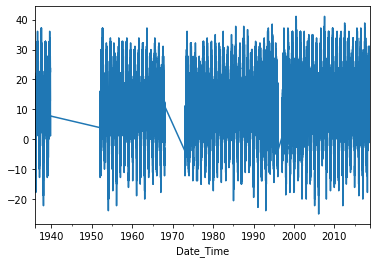

In [26]:
test1["Sofia"]["Temp, C"].plot()

There are some long periods with missing data prior to 1973.  As the data is more "dense" in the recent years (real measurements every 30 minutes, vs twice a day in the 1930-ies).  It will not be a huge loss if I drop all years prior to 1973.  Still almost 45 years of data left.

Also, we can see that for some reason there's no data for Ruse and Veliko Tarnovo after 2013 (station name change?).  I will drop these two cities completely.  There will be 4 series left -- Sofia and Varna, temperature and pressure.

In [130]:
#test1.drop("Ruse", axis=1, inplace=True)

In [132]:
#test1.drop("Veliko Tarnovo", axis=1, inplace=True)

In [27]:
test1

Varna                 Sofia             
                      Temp, C     SLP, hPa  Temp, C     SLP, hPa
Date_Time                                                       
1936-01-02 06:00:00   6.11000  1018.900000   0.0000  1019.800000
1936-01-02 07:00:00   6.06375  1018.866667   0.0925  1019.683333
1936-01-02 08:00:00   6.01750  1018.833333   0.1850  1019.566667
1936-01-02 09:00:00   5.97125  1018.800000   0.2775  1019.450000
1936-01-02 10:00:00   5.92500  1018.766667   0.3700  1019.333333
...                       ...          ...      ...          ...
2018-11-01 19:00:00  16.11000  1029.300000  17.2200  1025.166667
2018-11-01 20:00:00  16.11000  1029.400000  17.2200  1025.433333
2018-11-01 21:00:00  15.56000  1029.500000  17.7800  1025.700000
2018-11-01 22:00:00  15.00000  1029.500000  16.1100  1025.700000
2018-11-01 23:00:00  15.00000  1029.500000  16.1100  1025.700000

[726114 rows x 4 columns]

In [28]:
np.save("weather.npy", test1.values)
# NumPy binary format is the fastest and generates smallest files
# but the labels are not saved -- try the new pandas to_pickle instead.

<AxesSubplot:xlabel='Date_Time'>

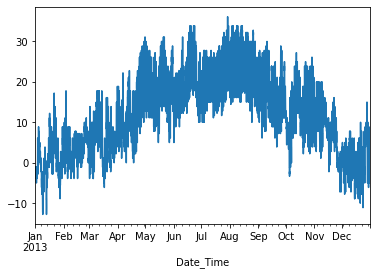

In [29]:
test1["Sofia"]["Temp, C"]['2013-01':'2013-12'].plot()

<AxesSubplot:xlabel='Date_Time'>

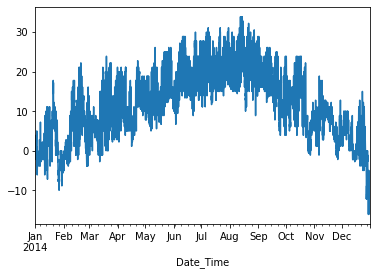

In [30]:
test1["Sofia"]["Temp, C"]['2014-01':'2014-12'].plot()

<AxesSubplot:xlabel='Date_Time'>

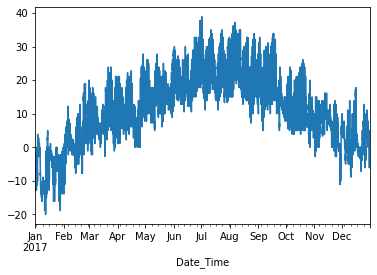

In [31]:
test1["Sofia"]["Temp, C"]['2017-01':'2017-12'].plot()

<AxesSubplot:xlabel='Date_Time'>

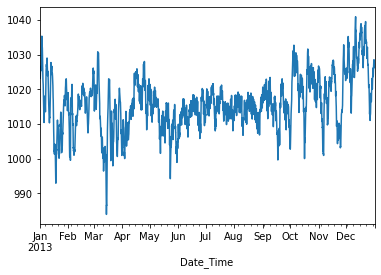

In [32]:
test1["Sofia"]["SLP, hPa"]['2013-01':'2013-12'].plot()

<AxesSubplot:xlabel='Date_Time'>

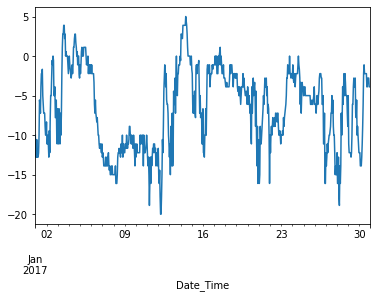

In [33]:
test1["Sofia"]["Temp, C"]['2017-01-01':'2017-01-30'].plot()

In [34]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726114 entries, 1936-01-02 06:00:00 to 2018-11-01 23:00:00
Freq: 60T
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   (Varna, Temp, C)   726114 non-null  float64
 1   (Varna, SLP, hPa)  726114 non-null  float64
 2   (Sofia, Temp, C)   726114 non-null  float64
 3   (Sofia, SLP, hPa)  726114 non-null  float64
dtypes: float64(4)
memory usage: 43.8 MB


## Add Data

As suggested in [2], we can add some input signals to the data that may help our model in making predictions.

> For example, given just a temperature of 10 degrees Celcius the model wouldn't know whether that temperature was measured during the day or the night, or during summer or winter. The model would have to infer this from the surrounding data-points which might not be very accurate for determining whether it's an abnormally warm winter, or an abnormally cold summer, or whether it's day or night. So having this information could make a big difference in how accurately the model can predict the next output.
[2]

Although the dataset does contain the date and time information for each observation, it is only used in the index so as to order the data. We will therefore add separate input-signals to the data-et for the day-of-year (between 1 and 366) and the hour-of-day (between 0 and 23).

In [35]:
test1['Various', 'Day'] = test1.index.dayofyear

In [36]:
test1['Various', 'Hour'] = test1.index.hour

In [37]:
test1

Varna                 Sofia              Various     
                      Temp, C     SLP, hPa  Temp, C     SLP, hPa     Day Hour
Date_Time                                                                    
1936-01-02 06:00:00   6.11000  1018.900000   0.0000  1019.800000       2    6
1936-01-02 07:00:00   6.06375  1018.866667   0.0925  1019.683333       2    7
1936-01-02 08:00:00   6.01750  1018.833333   0.1850  1019.566667       2    8
1936-01-02 09:00:00   5.97125  1018.800000   0.2775  1019.450000       2    9
1936-01-02 10:00:00   5.92500  1018.766667   0.3700  1019.333333       2   10
...                       ...          ...      ...          ...     ...  ...
2018-11-01 19:00:00  16.11000  1029.300000  17.2200  1025.166667     305   19
2018-11-01 20:00:00  16.11000  1029.400000  17.2200  1025.433333     305   20
2018-11-01 21:00:00  15.56000  1029.500000  17.7800  1025.700000     305   21
2018-11-01 22:00:00  15.00000  1029.500000  16.1100  1025.700000     305   22
2018-11-01 23:00:00  15.00000  1029.500000  16.1100  1025.700000     305   23

[726114 rows x 6 columns]

In [38]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726114 entries, 1936-01-02 06:00:00 to 2018-11-01 23:00:00
Freq: 60T
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   (Varna, Temp, C)   726114 non-null  float64
 1   (Varna, SLP, hPa)  726114 non-null  float64
 2   (Sofia, Temp, C)   726114 non-null  float64
 3   (Sofia, SLP, hPa)  726114 non-null  float64
 4   (Various, Day)     726114 non-null  int64  
 5   (Various, Hour)    726114 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 54.9 MB


In [39]:
test1.values.shape

(726114, 6)

In [40]:
# remove all before 1973 due to some gaps
test2 = test1["1973":]

In [41]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 401784 entries, 1973-01-01 00:00:00 to 2018-11-01 23:00:00
Freq: 60T
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   (Varna, Temp, C)   401784 non-null  float64
 1   (Varna, SLP, hPa)  401784 non-null  float64
 2   (Sofia, Temp, C)   401784 non-null  float64
 3   (Sofia, SLP, hPa)  401784 non-null  float64
 4   (Various, Day)     401784 non-null  int64  
 5   (Various, Hour)    401784 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 21.5 MB


In [279]:
#np.savez("weather.npz", test2.values)
# experiments

In [280]:
#data = np.load('weather.npy')
# more experiments

In [43]:
test2

Varna                Sofia              Various     
                       Temp, C     SLP, hPa Temp, C     SLP, hPa     Day Hour
Date_Time                                                                    
1973-01-01 00:00:00  -2.780000  1046.300000   -3.89  1047.100000       1    0
1973-01-01 01:00:00  -3.520000  1046.266667   -3.89  1047.133333       1    1
1973-01-01 02:00:00  -4.260000  1046.233333   -3.89  1047.166667       1    2
1973-01-01 03:00:00  -5.000000  1046.200000   -3.89  1047.200000       1    3
1973-01-01 04:00:00  -3.981667  1046.566667   -5.00  1047.466667       1    4
...                        ...          ...     ...          ...     ...  ...
2018-11-01 19:00:00  16.110000  1029.300000   17.22  1025.166667     305   19
2018-11-01 20:00:00  16.110000  1029.400000   17.22  1025.433333     305   20
2018-11-01 21:00:00  15.560000  1029.500000   17.78  1025.700000     305   21
2018-11-01 22:00:00  15.000000  1029.500000   16.11  1025.700000     305   22
2018-11-01 23:00:00  15.000000  1029.500000   16.11  1025.700000     305   23

[401784 rows x 6 columns]

In [44]:
test2.to_pickle("weather_VAR_SOF1")

## References


1. Magnus Erik Hvass Pedersen, [TensorFlow-Tutorials][1]
/ [GitHub](https://github.com/Hvass-Labs/TensorFlow-Tutorials) / [Videos on YouTube](https://www.youtube.com/playlist?list=PL9Hr9sNUjfsmEu1ZniY0XpHSzl5uihcXZ)

2. Ognian Dantchev, Multivariate Time Series Forecasting with Keras and TensorFlow, [GitHub](https://github.com/ogniandantchev/dilated_causal_cnn_time_series)



[1]: http://www.hvass-labs.org/

[2]: https://github.com/ogniandantchev/dilated_causal_cnn_time_series

